In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

2022-10-16 15:56:31.802414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 15:56:31.802447: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names =['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [5]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
dtype: int64

In [6]:
data.drop('origin', axis=1, inplace=True)
data.dropna(inplace=True)

In [7]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=3)

X_train = train_set.copy()
X_test = test_set.copy()

y_train = X_train.pop('mpg')
y_test = X_test.pop('mpg')

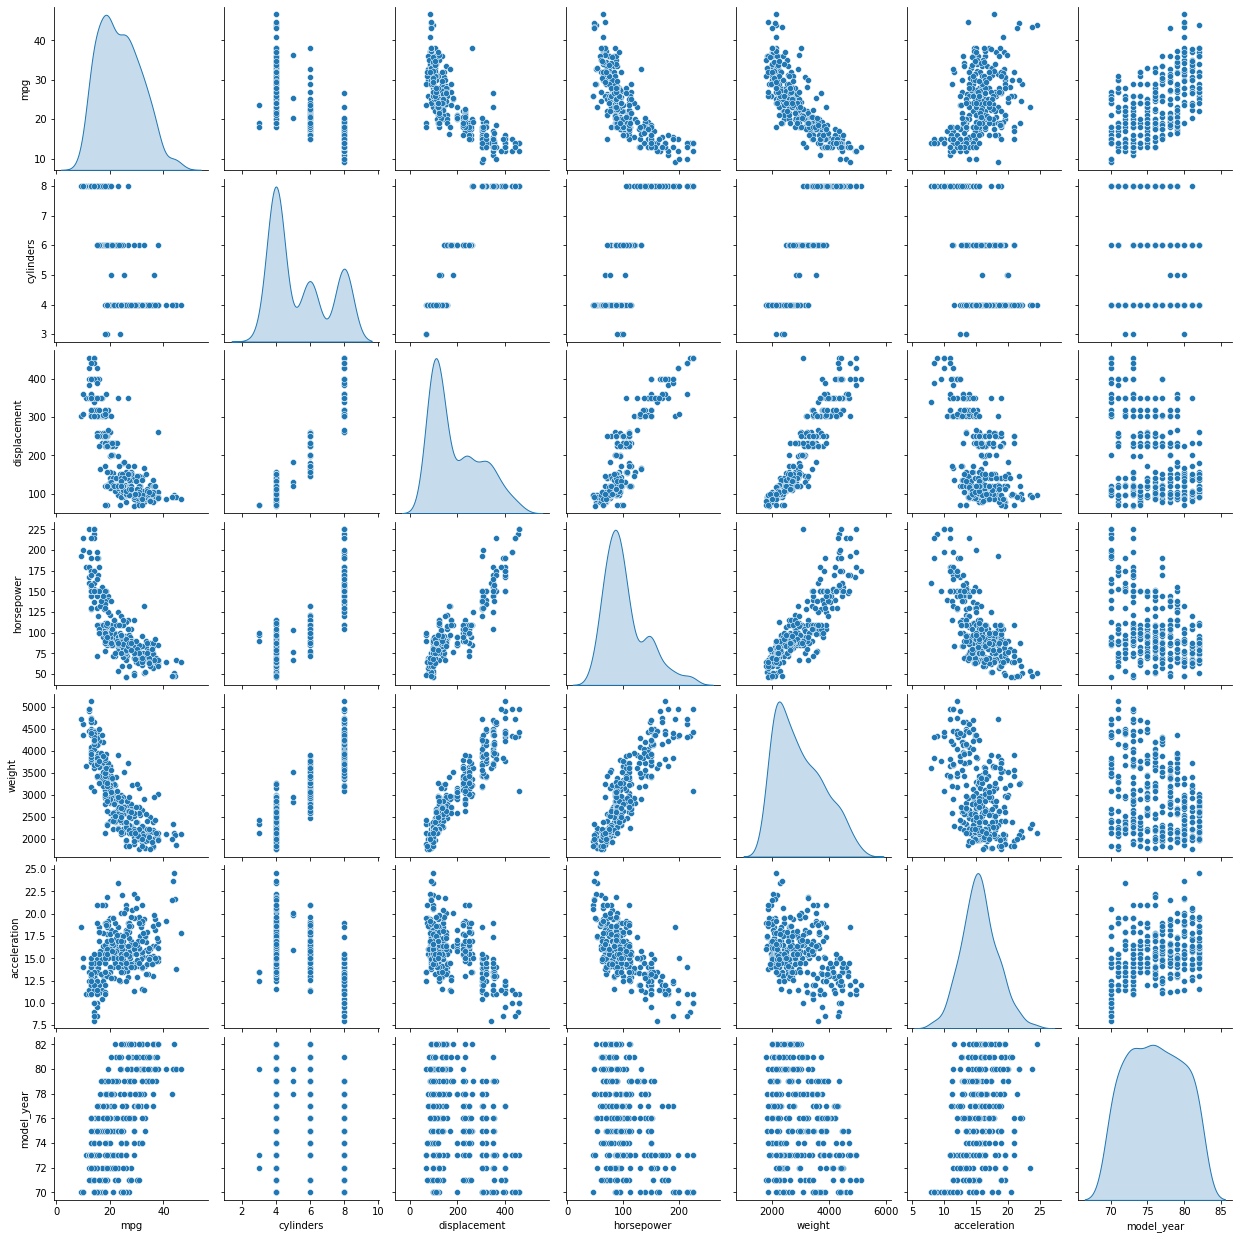

In [8]:
sns.pairplot(train_set, diag_kind='kde')
plt.show()

In [9]:
data_normalizer = tf.keras.layers.Normalization(axis=1)
data_normalizer.adapt(np.array(X_train))

2022-10-16 15:56:41.960763: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-16 15:56:41.960800: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (matrix): /proc/driver/nvidia/version does not exist
2022-10-16 15:56:41.961359: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = tf.keras.Sequential()
model.add(data_normalizer)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation=None))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,574
Trainable params: 2,561
Non-trainable params: 13
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
history = model.fit(X_train, y_train, epochs=40, verbose=True, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 1s 26ms/step - loss: 616.0948 - val_loss: 560.0062
Epoch 2/40
8/8 [==============================] - 0s 6ms/step - loss: 597.9614 - val_loss: 542.6226
Epoch 3/40
8/8 [==============================] - 0s 6ms/step - loss: 576.5678 - val_loss: 521.4465
Epoch 4/40
8/8 [==============================] - 0s 6ms/step - loss: 551.4481 - val_loss: 496.4442
Epoch 5/40
8/8 [==============================] - 0s 6ms/step - loss: 521.3259 - val_loss: 466.9728
Epoch 6/40
8/8 [==============================] - 0s 6ms/step - loss: 486.6232 - val_loss: 432.3390
Epoch 7/40
8/8 [==============================] - 0s 5ms/step - loss: 446.0505 - val_loss: 393.0982
Epoch 8/40
8/8 [==============================] - 0s 6ms/step - loss: 400.7031 - val_loss: 349.4991
Epoch 9/40
8/8 [==============================] - 0s 6ms/step - loss: 351.5218 - val_loss: 302.3333
Epoch 10/40
8/8 [==============================] - 0s 6ms/step - loss: 297.8581 - val_loss: 253.758

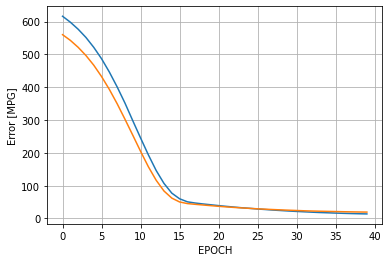

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('EPOCH')
plt.ylabel('Error [MPG]')
plt.grid()
plt.show()

In [14]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 14.4838


14.483759880065918

In [16]:
model.save("../model/model.h5")